EDA and Preprocessing

In [155]:
#importing libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [182]:
any_2015 = pd.read_csv("2015.csv")
any_2016 = pd.read_csv("2016.csv")
any_2017 = pd.read_csv("2017.csv")
any_2018 = pd.read_csv("2018.csv")
any_2019 = pd.read_csv("2019.csv")

In [183]:
any_2017 = any_2017.rename(columns = {
    'Happiness.Rank':'Happiness Rank', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 
    'Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'
})

any_2018 = any_2018.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})
any_2019 = any_2019.rename(columns = {
    'Country or region':'Country', 'Overall rank':'Happiness Rank', 'GDP per capita':'Economy (GDP per Capita)',
    'Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom',
    'Perceptions of corruption':'Trust (Government Corruption)'
})

In [185]:
for df in dfs:
    print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Gene

In [186]:
dfs = [any_2015, any_2016, any_2017, any_2018, any_2019]

In [187]:
df = pd.concat(dfs) #unim datasets
df =df.sort_values(by = ['Country']) #els ordenem per país

print("Número de mostres: ", len(df), "\n")

for col in df.columns:
    print(col)
    print("nulls: ", df[col].isnull().sum(), "\n")

Número de mostres:  782 

Country
nulls:  0 

Region
nulls:  467 

Happiness Rank
nulls:  0 

Happiness Score
nulls:  467 

Standard Error
nulls:  624 

Economy (GDP per Capita)
nulls:  0 

Family
nulls:  0 

Health (Life Expectancy)
nulls:  0 

Freedom
nulls:  0 

Trust (Government Corruption)
nulls:  1 

Generosity
nulls:  0 

Dystopia Residual
nulls:  467 

Lower Confidence Interval
nulls:  625 

Upper Confidence Interval
nulls:  625 

Happiness.Score
nulls:  627 

Whisker.high
nulls:  627 

Whisker.low
nulls:  627 

Dystopia.Residual
nulls:  627 

Score
nulls:  470 



In [188]:
df = df.drop(columns=['Happiness Score','Standard Error','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval','Happiness.Score','Whisker.high','Whisker.low','Dystopia.Residual','Score',])
#eliminem les columnes amb 467 o més valors nulls, menys GDP per càpita
df = df.reset_index()
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Cyprus')].index)
df = df.drop(index=df.iloc[np.where(df['Country'] == 'Northern Macedonia')].index)

df.at[625,['Country']] = 'Somaliland Region'

Tractament dels valors nuls restants

In [189]:
countries = list(set(df['Country'].values))
countries = sorted(countries)

In [190]:
new_regions = []
for i in range(len(countries)):
        country_index = np.where(df['Country'] == countries[i]) # Get indexes of current country
        current_country_df = df.iloc[country_index] #get values of current indexes
        if all(pd.isnull(current_country_df['Region'].values)): # if all null for regions, drop country from df
            country_index = np.where(df['Country'] == countries[i])[0]
            for vals in country_index:
                try:
                    df = df.drop(index = vals)
                except KeyError:
                    pass
        else:
            region_name_pos = np.where([type(x) == str for x in current_country_df['Region'].values])[0][0]
            region = current_country_df['Region'].values[region_name_pos]
            current_country_df = current_country_df.replace(np.nan, region)
            new_regions.append(current_country_df['Region'].values)

In [191]:
new_regions = list(new_regions)
k = 0
region_vals = []
for arr in new_regions:
    for vals in arr:
        region_vals.append(vals)
        k+=1
        
len(region_vals)

771

In [192]:
df['Region'] = region_vals
df.head(20)

,index,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,153,Afghanistan,Southern Asia,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
1,152,Afghanistan,Southern Asia,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
2,144,Afghanistan,Southern Asia,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
3,153,Afghanistan,Southern Asia,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
4,140,Afghanistan,Southern Asia,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
5,108,Albania,Central and Eastern Europe,109,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313
6,108,Albania,Central and Eastern Europe,109,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400
7,111,Albania,Central and Eastern Europe,112,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000
8,106,Albania,Central and Eastern Europe,107,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000
9,94,Albania,Central and Eastern Europe,95,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720


In [193]:
#Convertire les regions en variables categóriques i les afegiré com a columnes ja que poden
#aportar informació interessant

In [194]:
one_hot_regions = pd.get_dummies(df['Region'],prefix = 'Region') #convertim les regions en un dataset categóric
df = df.join(one_hot_regions) #afegim les noves columnes al dataframe principal
df = df.drop(columns = 'Region') #eliminem la columna de les regions

In [195]:
#ara el data frame llueix així:
df

,index,Country,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,153,Afghanistan,154,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,0,0,0,0,0,0,0,1,0,0
1,152,Afghanistan,153,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,0,0,0,0,0,0,0,1,0,0
2,144,Afghanistan,145,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,0,0,0,0,0,0,0,1,0,0
3,153,Afghanistan,154,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,0,0,0,0,0,0,0,1,0,0
4,140,Afghanistan,141,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,143,Zimbabwe,144,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,0,0,0,0,0,0,0,0,1,0
778,145,Zimbabwe,146,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,0,0,0,0,0,0,0,0,1,0
779,114,Zimbabwe,115,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,0,0,0,0,0,0,0,0,1,0
780,130,Zimbabwe,131,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,0,0,0,0,0,0,0,0,1,0


In [231]:
print(np.max(df['Happiness Rank']))
print(np.min(df['Happiness Rank']))

values = list(df['Happiness Rank'].values)
values.reverse()
top_50 = values[50]
print(top_50)

158
1
147


Un altre caraterística a modificar és el rang de felicitat ('Happiness Rank') ja que serà la nostra característica objectiu, la característica a predir segons les altres cracterístiques. 
Com el seu rang de valors és molt ampli, concretament pot agafar valors de l'1 al 158 i per tant predir-lo seria massa complicat. Com el que ens interessa en el fons és saber si la població és majoritáriament feliç o no, dividrem les msotres segons feliços = 1 (amb happiness rank >= mitja) o no feliços = 0.

In [232]:
happiness_benchmark = []
for rank in df['Happiness Rank'].values:
    if rank <= 147:
        happiness_benchmark.append(1)
    else:
        happiness_benchmark.append(0)
df['Happiness Rank'] = happiness_benchmark
df=df.sample(frac=1)

In [233]:
df = df.drop(columns = ['Country', 'index'])

In [234]:
df = df.dropna(axis=0)
target = df['Happiness Rank']

In [235]:
df = df.drop(columns = ['Happiness Rank'])

In [236]:
df.isnull().values.any()

False

In [237]:
df

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
489,0.446260,0.696990,0.500730,0.37012,0.070080,0.381600,0,0,0,0,0,0,0,1,0,0
139,1.159000,1.369000,0.920000,0.35700,0.056000,0.187000,0,0,0,1,0,0,0,0,0,0
3,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,0,0,0,0,0,0,0,1,0,0
408,1.609000,1.479000,1.012000,0.52600,0.316000,0.194000,0,0,0,0,0,0,0,0,0,1
446,1.007610,0.985210,0.709500,0.56066,0.075210,0.377440,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0.975000,1.369000,0.685000,0.28800,0.043000,0.134000,0,1,0,0,0,0,0,0,0,0
377,1.113120,1.095620,0.724370,0.29671,0.063320,0.182260,0,1,0,0,0,0,0,0,0,0
239,0.950613,0.570615,0.649547,0.30941,0.251667,0.054009,0,1,0,0,0,0,0,0,0,0
413,0.208240,0.668010,0.467210,0.19184,0.081240,0.213330,0,0,0,0,0,0,0,0,1,0


Anem a crear l'arbre

In [238]:
n = len(df)
percentatge = int(0.8 * n)
caract = df.columns
x = df[list(caract)][:percentatge]
y = target[:percentatge]

x_test = df[list(caract)][percentatge:]
y_test = target[percentatge:]

In [239]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x,y)

RandomForestClassifier()

In [242]:
accuracies = []
for i in np.arange(1,4): #Want to make it read-able, so beyond 4 is too much
    max_depth = i
    print('max_depth :', i)
    dt_classifier = DecisionTreeClassifier(max_depth = max_depth)
    dt_classifier.fit(x,y)
    pred = dt_classifier.predict(x_test)
    print(accuracy_score(y_true = y_test, y_pred = pred))
    accuracies.append(accuracy_score(y_true = y_test, y_pred = pred))
    
best = np.max(accuracies)
best_depth = np.where(accuracies == best)[0][0]

dt_classifier = DecisionTreeClassifier(max_depth = best_depth)
dt_classifier.fit(x,y)

max_depth : 1
0.9415584415584416
max_depth : 2
0.948051948051948
max_depth : 3
0.948051948051948


DecisionTreeClassifier(max_depth=1)

[Text(1116.0, 1549.2599999999998, 'Region_North America <= 0.5\ngini = 0.116\nsamples = 616\nvalue = [38, 578]\nclass = Top 50'),
 Text(558.0, 516.4200000000001, 'gini = 0.103\nsamples = 607\nvalue = [33, 574]\nclass = Top 50'),
 Text(1674.0, 516.4200000000001, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Not Top 50')]

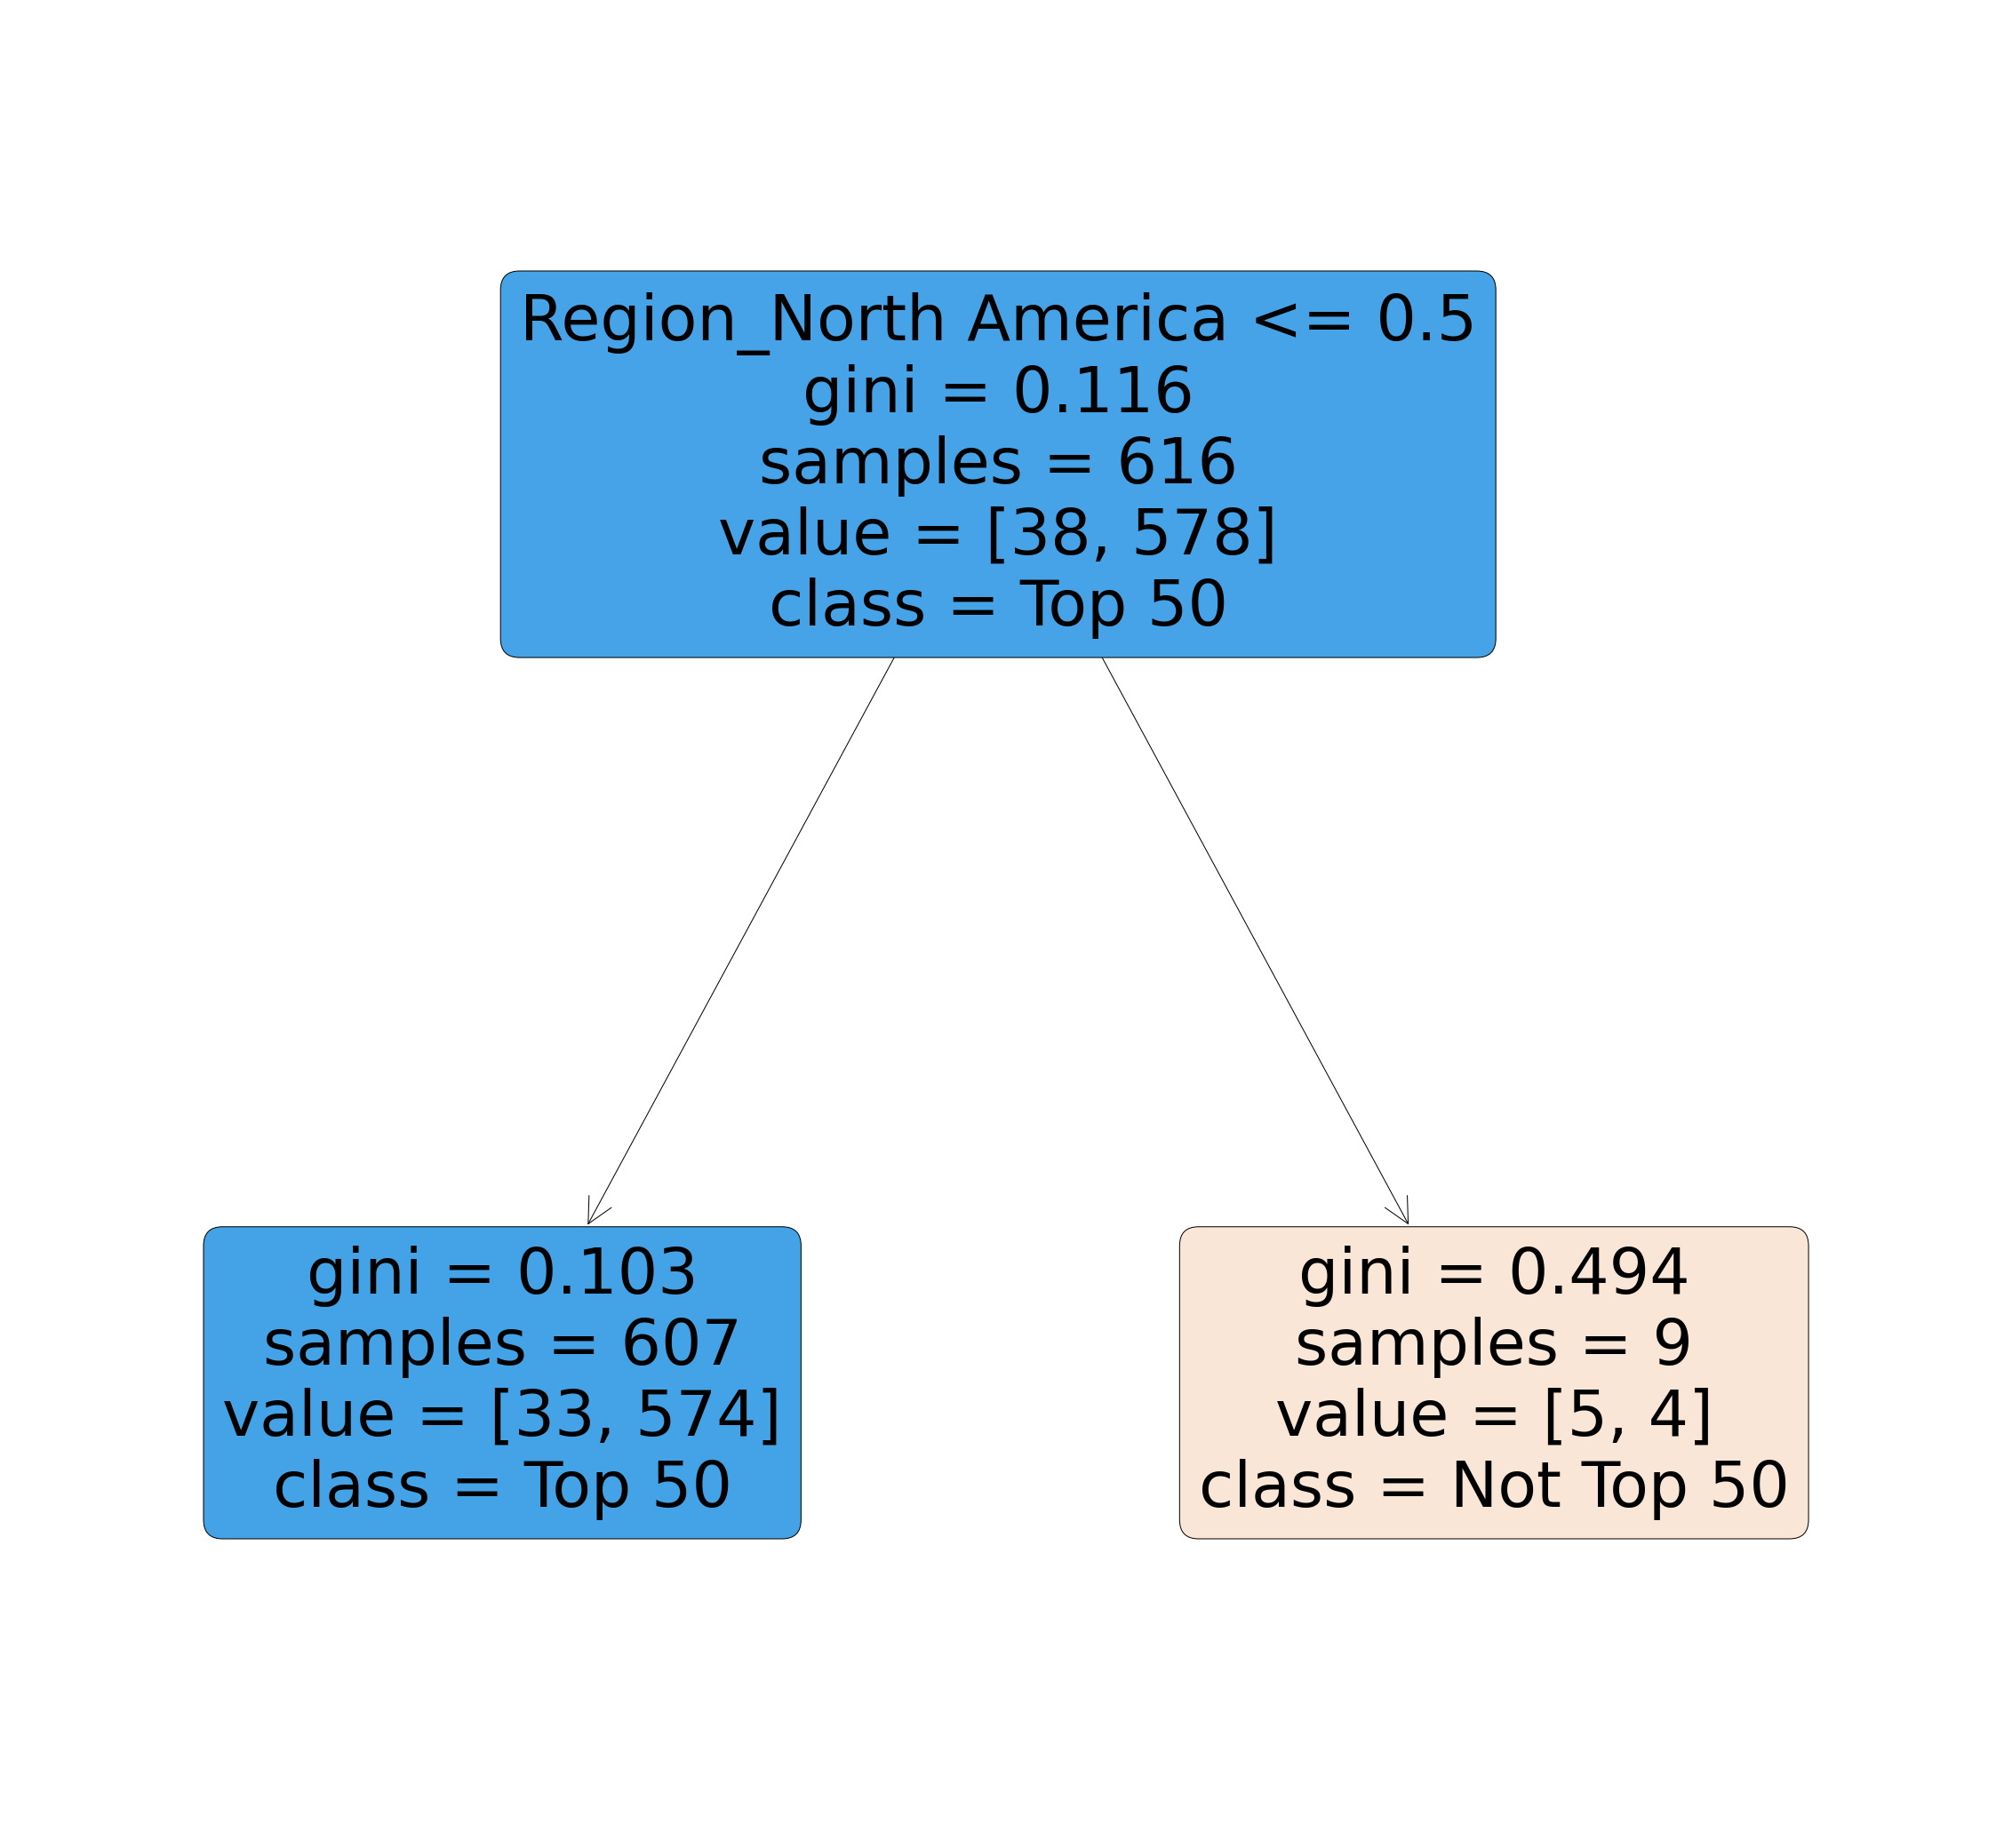

In [244]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,38))
plot_tree(dt_classifier, feature_names = caract, class_names = ['Not Top 50', 'Top 50'],  # 0 -> not top 50, 1 -> top 50
          filled=True, rounded = True)

In [245]:
preds_dtc = dt_classifier.predict(x_test)
preds_rfc = rf_classifier.predict(x_test)

In [246]:
accuracy_score(y_true = y_test, y_pred = preds_dtc)

0.9415584415584416

In [247]:
accuracy_score(y_true = y_test, y_pred = preds_rfc)

0.9545454545454546